<a href="https://colab.research.google.com/github/clyed-muumbi/assignment2/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/GEO') #Create a virtual drive


Mounted at /content/GEO


In [5]:
import pandas as pd

In [34]:
mydata=pd.read_csv('/content/GEO/MyDrive/road_accident_severity_dataset.csv')
print("shape of the dataset:", mydata.shape)
mydata.head()

shape of the dataset: (100, 7)


,Accident_Severity,Speed_Limit,Weather_Condition,Road_Surface_Condition,Light_Conditions,Vehicle_Type,Time_of_Day
0,3,50,0,2,1,3,8
1,1,40,2,0,2,3,23
2,3,40,1,1,1,1,2
3,3,20,1,1,0,1,16
4,1,40,0,2,0,3,2


In [35]:
features = ['Speed_Limit', 'Weather_Condition', 'Road_Surface_Condition', 'Light_Conditions', 'Vehicle_Type', 'Time_of_Day']
print(features)

['Speed_Limit', 'Weather_Condition', 'Road_Surface_Condition', 'Light_Conditions', 'Vehicle_Type', 'Time_of_Day']


In [37]:
mydata=pd.read_csv('/content/GEO/MyDrive/road_accident_severity_dataset.csv')
data=mydata.loc[:,['Accident_Severity','Time_of_Day']]
data.head(10)

,Accident_Severity,Time_of_Day
0,3,8
1,1,23
2,3,2
3,3,16
4,1,2
5,1,15
6,3,3
7,2,17
8,3,16
9,3,6


In [12]:
import matplotlib.pyplot as plt

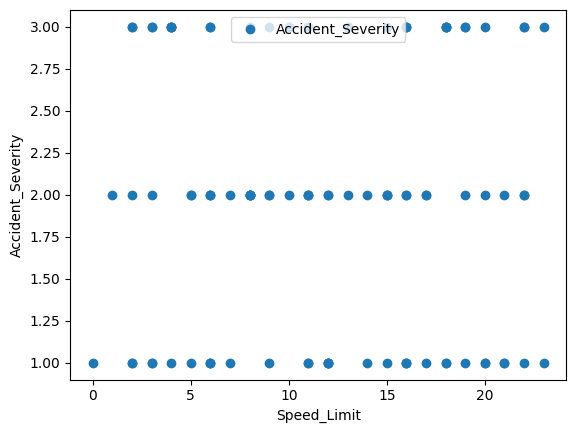

In [33]:
mydata=pd.read_csv('/content/GEO/MyDrive/road_accident_severity_dataset.csv')
mydata.plot(y='Accident_Severity',x='Time_of_Day',style='o')
plt.xlabel('Speed_Limit')
plt.ylabel('Accident_Severity')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

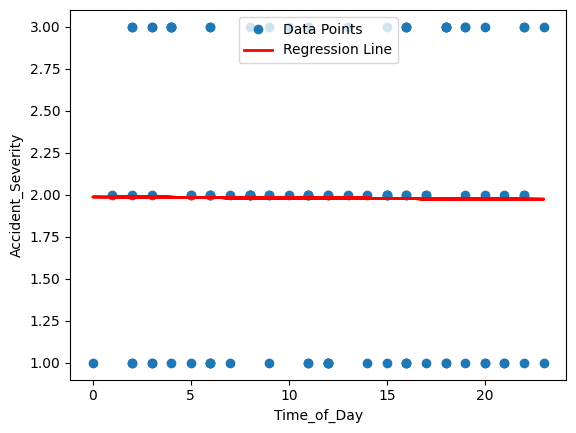

In [15]:
mydata=pd.read_csv('/content/GEO/MyDrive/road_accident_severity_dataset.csv')
x=mydata[['Time_of_Day']]
y=mydata['Accident_Severity']
regressor = LinearRegression()
regressor.fit(x, y)
mydata.plot(y='Accident_Severity',x='Time_of_Day',style='o', label='Data Points')
plt.plot(x, regressor.predict(x), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Time_of_Day')
plt.ylabel('Accident_Severity')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
mydata=pd.read_csv('/content/GEO/MyDrive/road_accident_severity_dataset.csv')
x=pd.DataFrame(data['Time_of_Day'])
y=pd.DataFrame(data['Accident_Severity'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(80, 1)
(20, 1)
(80, 1)
(20, 1)


In [18]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[2.13538432]
[[-0.01599865]]


In [19]:
y_pred = regressor.predict(x_test)
y_pred

array([[1.84740868],
       [2.13538432],
       [2.00739514],
       [2.02339379],
       [1.84740868],
       [1.78341409],
       [1.83141003],
       [1.89540462],
       [2.03939244],
       [1.9913965 ],
       [2.05539108],
       [1.89540462],
       [2.07138973],
       [1.81541139],
       [1.94340056],
       [1.9593992 ],
       [1.84740868],
       [1.83141003],
       [2.07138973],
       [1.76741545]])

In [20]:
y_test.head(10)

,Accident_Severity
80,3
84,1
33,2
81,1
93,3
17,2
36,3
82,2
69,1
65,2


In [21]:
from sklearn import metrics
import numpy as np

In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.7705752987662675
Mean Squared Error (MSE): 0.8010299429411027
Root Mean Squared Error (RMSE): 0.8950027614153505


In [23]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file:
  pickle.dump(model, file)